In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
emails_data = pd.read_csv("spam.csv")
emails_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
emails_data["Category"].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

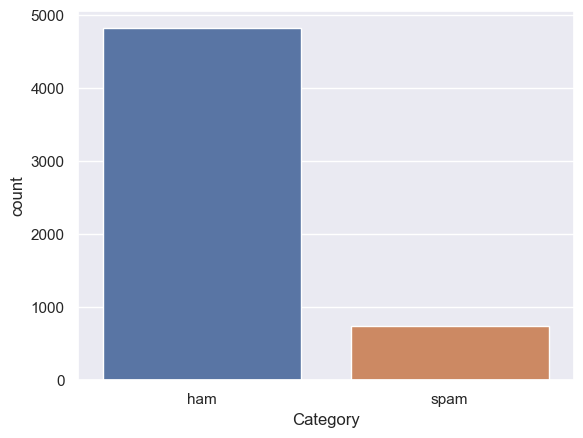

In [4]:
sns.set()
sns.countplot(x="Category",data=emails_data)

In [5]:
# Label Encoding for "Category" column
emails_data.replace({"Category":{"ham":0,"spam":1}},inplace=True)

In [6]:
emails_data

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [7]:
# Extracting Dependent and Independent variables
x = emails_data["Message"]
y = emails_data["Category"]

In [8]:
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify =y)

In [9]:
print(emails_data.shape,x_train.shape,x_test.shape)

(5572, 2) (4457,) (1115,)


In [10]:
# Converting text to vector
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_train_cv = cv.fit_transform(x_train).toarray()
x_test_cv = cv.transform(x_test).toarray()

In [11]:
x_train_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
x_train_cv.shape

(4457, 7718)

In [13]:
x_test_cv.shape

(1115, 7718)

In [14]:
dir(cv)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_n_features',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_validate_data',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',
 '_white_spaces',
 '_word_ngrams',
 'analyzer',
 'binary',
 'build_analyzer',
 'build_preprocessor',
 'build_tokenizer',
 'decode',
 'decode_error',
 'dtype',
 'encoding',
 'fit',
 'fit_transform',
 'fixe

In [15]:
cv.vocabulary_

{'don': 2408,
 'look': 4208,
 'back': 1203,
 'at': 1126,
 'the': 6802,
 'building': 1565,
 'because': 1289,
 'you': 7678,
 'have': 3368,
 'no': 4802,
 'coat': 1886,
 'and': 969,
 'want': 7351,
 'to': 6922,
 'get': 3122,
 'more': 4589,
 'sick': 6137,
 'just': 3883,
 'hurry': 3578,
 'home': 3486,
 'wear': 7397,
 'gym': 3294,
 'its': 3777,
 'site': 6175,
 'simulate': 6160,
 'test': 6769,
 'it': 3770,
 'gives': 3153,
 'very': 7250,
 'tough': 6985,
 'questions': 5524,
 'your': 7683,
 'readiness': 5592,
 'should': 6110,
 'add': 817,
 'that': 6799,
 'really': 5603,
 'care': 1668,
 'if': 3618,
 'can': 1643,
 'least': 4071,
 'this': 6843,
 'dude': 2485,
 'fuck': 3034,
 'off': 4896,
 'but': 1587,
 'hey': 3434,
 'money': 4573,
 'so': 6274,
 'whats': 7455,
 'plan': 5228,
 'sat': 5897,
 'good': 3189,
 'morning': 4593,
 'plz': 5259,
 'call': 1618,
 'me': 4408,
 'sir': 6169,
 'goal': 3171,
 'arsenal': 1091,
 'henry': 3421,
 'liverpool': 4167,
 'scores': 5930,
 'with': 7529,
 'simple': 6156,
 'shot': 

In [16]:
# Returning index,where value not equal 0 of first x_train_cv data
np.where(x_train_cv[0] != 0)

(array([ 969, 1126, 1203, 1289, 1565, 1886, 2408, 3122, 3294, 3368, 3486,
        3578, 3883, 4208, 4589, 4802, 6137, 6802, 6922, 7351, 7397, 7678],
       dtype=int64),)

In [17]:
# Training the model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_cv, y_train)

MultinomialNB()

In [18]:
# Test data Prediction
y_pred = model.predict(x_test_cv)

In [19]:
# Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.94      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



<AxesSubplot:>

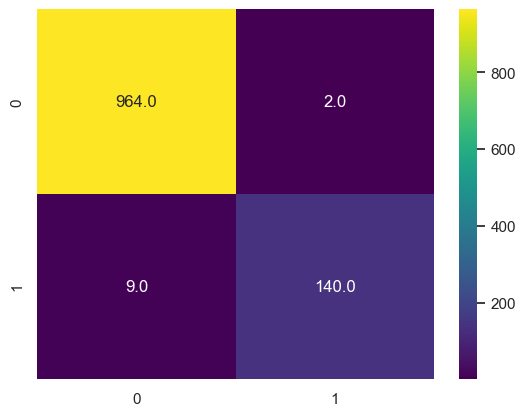

In [20]:
# Confusuion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualization
sns.set()
sns.heatmap(cm, fmt= ".1f", annot=True, cbar=True, cmap="viridis")

In [21]:
# Real life test
exmaple_email = ["Hey Ozil, you have got 60% discount on shopping. Hurry up! Grabs it till finished."]

# Coverting text to vector
example_email_cv = cv.transform(exmaple_email).toarray()

# Prediction for email
prediction = model.predict(example_email_cv)
print(prediction[0])
if prediction[0] == "0":
    print("The example email is Ham")
else:
    print("The example email is Spam")

0
The example email is Spam


# Using Scikit-Learn Pipeline

In [22]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("nb", MultinomialNB())
])
clf.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [23]:
# Test data Prediction
y_pred_1 = clf.predict(x_test)

In [24]:
# Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred_1)
print(cr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.94      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



<AxesSubplot:>

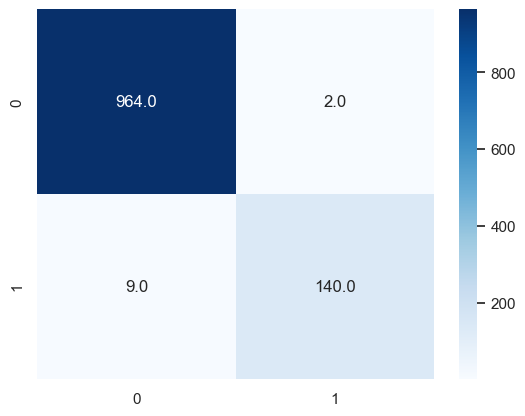

In [25]:
# Confusuion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_1)

# Visualization
sns.set()
sns.heatmap(cm, fmt= ".1f", annot=True, cbar=True, cmap="Blues")

In [26]:
# Real life test
exmaple_email = ["Hey Ozil, you have got 60% discount on shopping. Hurry up! Grabs it till finished."]

# Prediction for email
prediction = clf.predict(exmaple_email)
print(prediction[0])
if prediction[0] == "0":
    print("The example email is Ham")
else:
    print("The example email is Spam")

0
The example email is Spam
